In [1]:
!python --version


Python 3.8.10


In [1]:
import numpy as np
import pandas as pd

# Data Gathering

In [4]:
CarPrice_df1.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [3]:
CarPrice = pd.read_csv("CarPrice.csv")
CarPrice_df = pd.DataFrame(CarPrice)
CarPrice_df1 = pd.DataFrame(CarPrice)
CarPrice_df1.head(2)

car_ID  symboling              CarName fueltype aspiration doornumber  \
0       1          3   alfa-romero giulia      gas        std        two   
1       2          3  alfa-romero stelvio      gas        std        two   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  

[2 rows x 26 columns]

# EDA 

In [370]:
CarPrice_df.shape

(205, 26)

In [5]:
CarPrice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
CarPrice_df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

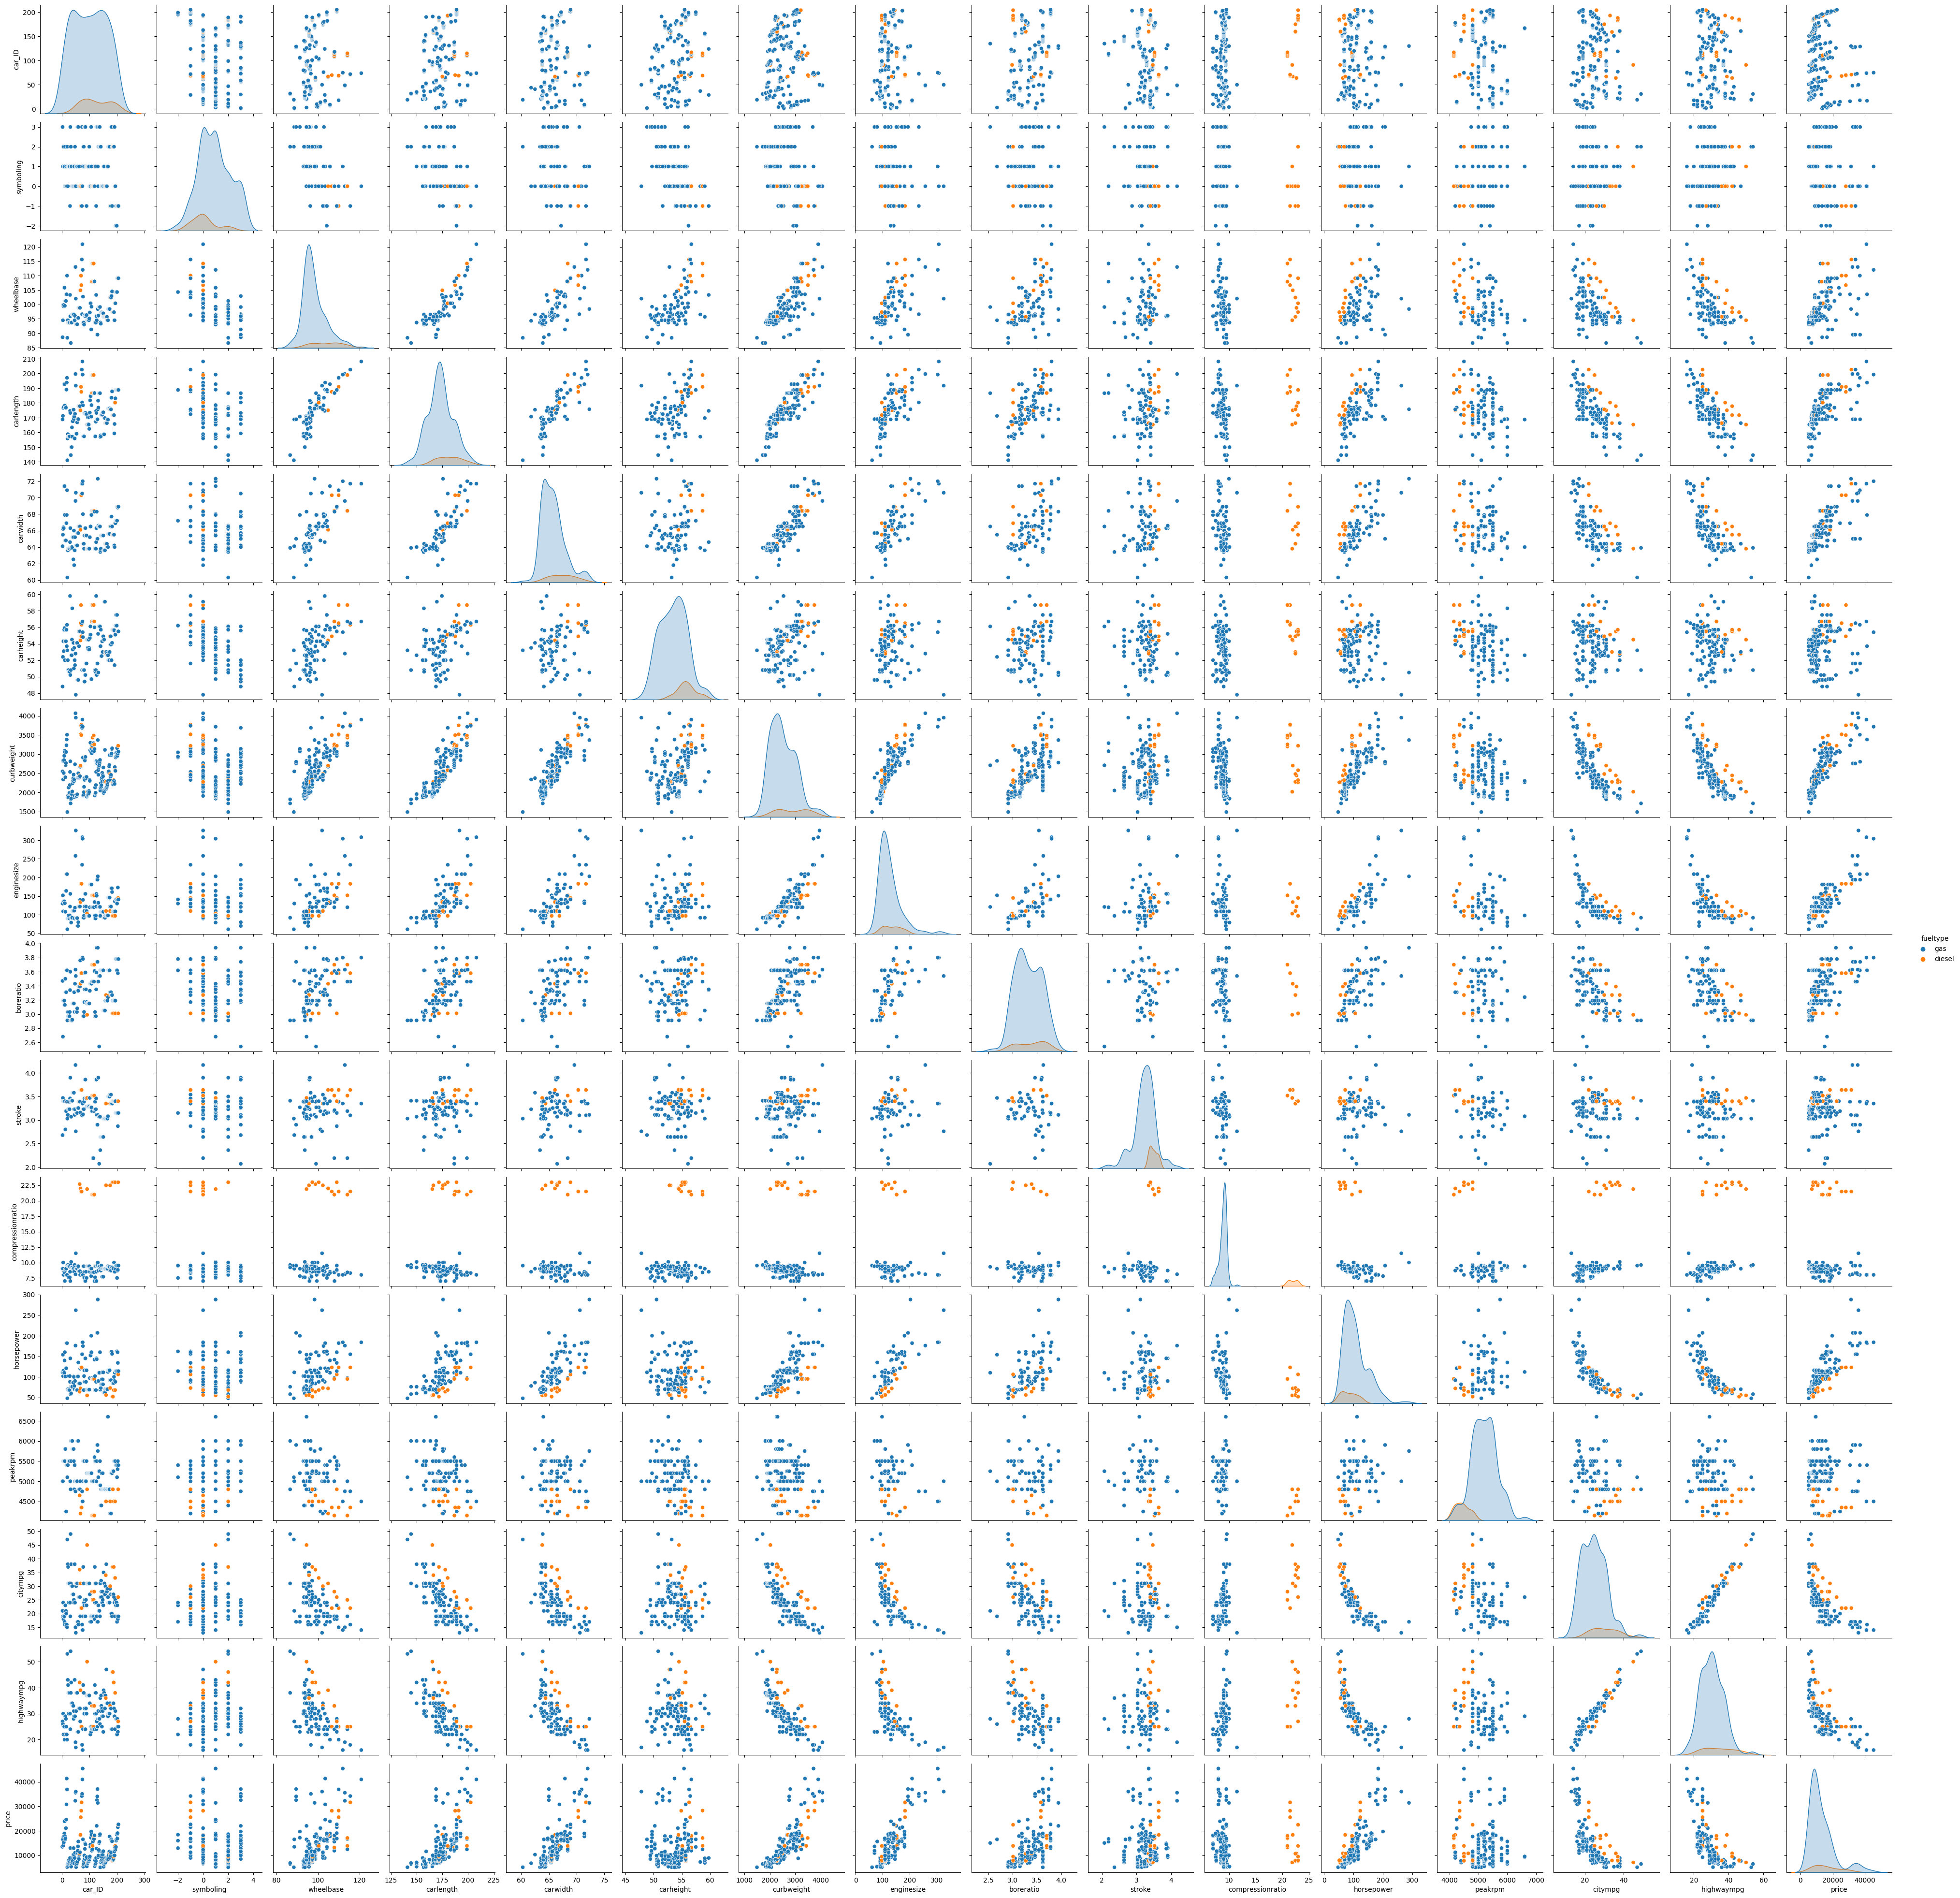

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(CarPrice_df,hue = 'fueltype')


In [8]:
corr=CarPrice_df.corr()
corr.style.background_gradient(cmap='inferno')

<AxesSubplot:>

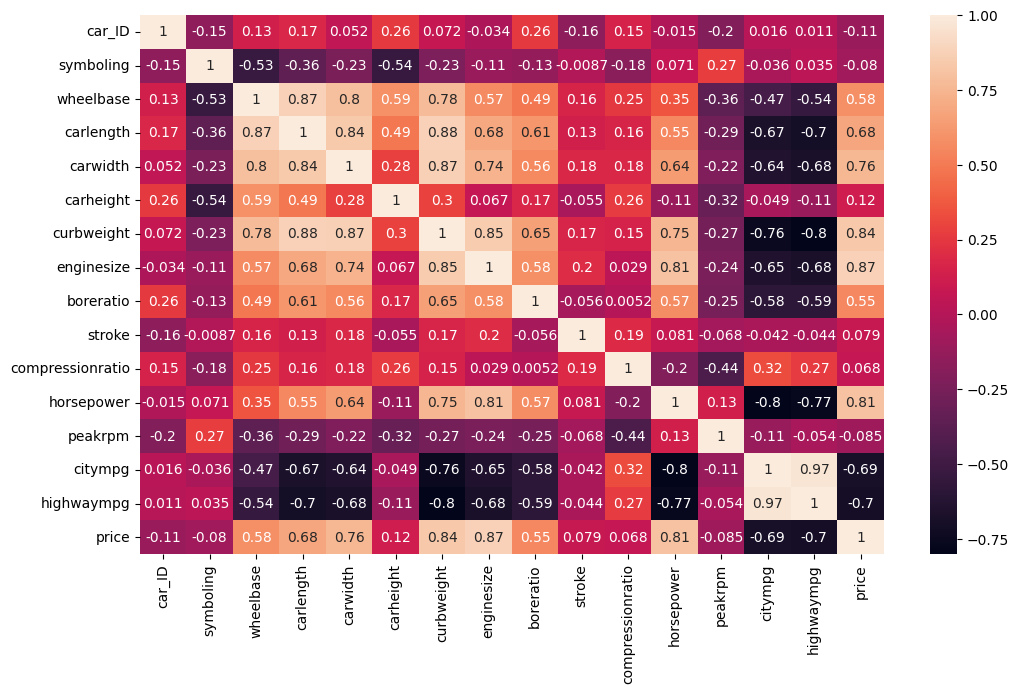

In [9]:
plt.figure(figsize = (12,7))
sns.heatmap(CarPrice_df.corr(),annot=True)

# Feature Engg. 

In [10]:
A = {'fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem'}


In [11]:
print(CarPrice_df['fueltype'].unique())
print(CarPrice_df['aspiration'].unique())
print(CarPrice_df['doornumber'].unique())
print(CarPrice_df['carbody'].unique())
print(CarPrice_df['drivewheel'].unique())
print(CarPrice_df['enginelocation'].unique())
print(CarPrice_df['enginetype'].unique())
print(CarPrice_df['cylindernumber'].unique())
print(CarPrice_df['fuelsystem'].unique())



['gas' 'diesel']
['std' 'turbo']
['two' 'four']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['front' 'rear']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [12]:
columns=[ 'fueltype', 'aspiration', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype',
       'fuelsystem']
CarPrice_df1=pd.get_dummies(CarPrice_df,columns=columns,drop_first=True)
CarPrice_df1.head()


car_ID  symboling                   CarName doornumber  wheelbase  \
0       1          3        alfa-romero giulia        two       88.6   
1       2          3       alfa-romero stelvio        two       88.6   
2       3          1  alfa-romero Quadrifoglio        two       94.5   
3       4          2               audi 100 ls       four       99.8   
4       5          2                audi 100ls       four       99.4   

   carlength  carwidth  carheight  curbweight cylindernumber  ...  \
0      168.8      64.1       48.8        2548           four  ...   
1      168.8      64.1       48.8        2548           four  ...   
2      171.2      65.5       52.4        2823            six  ...   
3      176.6      66.2       54.3        2337           four  ...   
4      176.6      66.4       54.3        2824           five  ...   

   enginetype_ohcf  enginetype_ohcv  enginetype_rotor  fuelsystem_2bbl  \
0                0                0                 0                0   
1                0                0                 0                0   
2                0                1                 0                0   
3                0                0                 0                0   
4                0                0                 0                0   

   fuelsystem_4bbl  fuelsystem_idi  fuelsystem_mfi  fuelsystem_mpfi  \
0                0               0               0                1   
1                0               0               0                1   
2                0               0               0                1   
3                0               0               0                1   
4                0               0               0                1   

   fuelsystem_spdi  fuelsystem_spfi  
0                0                0  
1                0                0  
2                0                0  
3                0                0  
4                0                0  

[5 rows x 41 columns]

In [13]:
CarPrice_df1['cylindernumber'].replace({'two': 2, 'three': 3, 'four': 4,'five': 5,'six': 6,'eight': 8,'twelve': 12},inplace=True)
CarPrice_df1['doornumber'].replace({'two': 2, 'four': 4,},inplace=True)


In [385]:
CarPrice_df1.head()

car_ID  symboling                   CarName  doornumber  wheelbase  \
0       1          3        alfa-romero giulia           2       88.6   
1       2          3       alfa-romero stelvio           2       88.6   
2       3          1  alfa-romero Quadrifoglio           2       94.5   
3       4          2               audi 100 ls           4       99.8   
4       5          2                audi 100ls           4       99.4   

   carlength  carwidth  carheight  curbweight  cylindernumber  ...  \
0      168.8      64.1       48.8        2548               4  ...   
1      168.8      64.1       48.8        2548               4  ...   
2      171.2      65.5       52.4        2823               6  ...   
3      176.6      66.2       54.3        2337               4  ...   
4      176.6      66.4       54.3        2824               5  ...   

   enginetype_ohcf  enginetype_ohcv  enginetype_rotor  fuelsystem_2bbl  \
0                0                0                 0                0   
1                0                0                 0                0   
2                0                1                 0                0   
3                0                0                 0                0   
4                0                0                 0                0   

   fuelsystem_4bbl  fuelsystem_idi  fuelsystem_mfi  fuelsystem_mpfi  \
0                0               0               0                1   
1                0               0               0                1   
2                0               0               0                1   
3                0               0               0                1   
4                0               0               0                1   

   fuelsystem_spdi  fuelsystem_spfi  
0                0                0  
1                0                0  
2                0                0  
3                0                0  
4                0                0  

[5 rows x 41 columns]

In [14]:
CarPrice_df1['CarName']=CarPrice_df1['CarName'].apply(lambda x: x.split(' ')[0])

In [15]:
CarPrice_df1['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [388]:
CarPrice_df1['CarName'].replace({'maxda': 'mazda', 'nissan': 'Nissan','vw': 'volkswagen','porcshce': 'porsche','vokswagen': 'volkswagen','toyouta': 'toyota'},inplace=True)

In [389]:
CarPrice_df1['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [390]:
CarPrice_df1.columns

Index(['car_ID', 'symboling', 'CarName', 'doornumber', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'fueltype_gas',
       'aspiration_turbo', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_rear', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')

## Outliers handling

<AxesSubplot:>

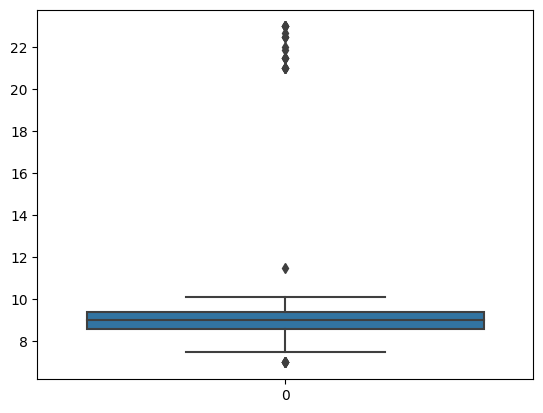

In [391]:
sns.boxplot(CarPrice_df1['compressionratio'])

In [392]:
CarPrice_df['wheelbase']

0       88.6
1       88.6
2       94.5
3       99.8
4       99.4
       ...  
200    109.1
201    109.1
202    109.1
203    109.1
204    109.1
Name: wheelbase, Length: 205, dtype: float64

In [393]:
def outlier_handling(column):
    q1 = CarPrice_df[column].quantile(0.25)
    q3 = CarPrice_df[column].quantile(0.75)
    iqr = q3 - q1
    lower_tail = q1 - iqr*1.5
    upper_tail = q3 + iqr*1.5
    print(f'Lower_tail {lower_tail}')
    print(f'upper_tail {upper_tail}')

In [394]:
outlier_handling('wheelbase')

Lower_tail 82.64999999999999
upper_tail 114.25000000000001


In [395]:
CarPrice_df1['wheelbase'].loc[CarPrice_df['wheelbase']> 114.25000000000001]= 114.25000000000001

C:\Users\hp\AppData\Local\Temp\ipykernel_32332\974187598.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CarPrice_df1['wheelbase'].loc[CarPrice_df['wheelbase']> 114.25000000000001]= 114.25000000000001


In [396]:
outlier_handling('carwidth')

Lower_tail 59.89999999999998
upper_tail 71.10000000000002


In [397]:
CarPrice_df1['carwidth'].loc[CarPrice_df['carwidth']>71.10000000000002]= 71.10000000000002

C:\Users\hp\AppData\Local\Temp\ipykernel_32332\1407415409.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CarPrice_df1['carwidth'].loc[CarPrice_df['carwidth']>71.10000000000002]= 71.10000000000002


In [398]:
CarPrice_df['carwidth'].median()

65.5

In [399]:
outlier_handling('enginesize')

Lower_tail 31.0
upper_tail 207.0


In [400]:
CarPrice_df1['enginesize'].loc[CarPrice_df1['enginesize']> 207.0]=207.0

C:\Users\hp\AppData\Local\Temp\ipykernel_32332\1368573307.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CarPrice_df1['enginesize'].loc[CarPrice_df1['enginesize']> 207.0]=207.0


In [401]:
CarPrice_df1['enginesize'].median()

120.0

In [402]:
outlier_handling('stroke')
CarPrice_df1['stroke'].loc[CarPrice_df1['stroke']> 3.86] = 3.86
CarPrice_df1['stroke'].loc[CarPrice_df1['stroke']< 2.6599999999999993] =2.6599999999999993

Lower_tail 2.6599999999999993
upper_tail 3.8600000000000003


C:\Users\hp\AppData\Local\Temp\ipykernel_32332\510545047.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CarPrice_df1['stroke'].loc[CarPrice_df1['stroke']> 3.86] = 3.86
C:\Users\hp\AppData\Local\Temp\ipykernel_32332\510545047.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CarPrice_df1['stroke'].loc[CarPrice_df1['stroke']< 2.6599999999999993] =2.6599999999999993


In [403]:
outlier_handling('stroke')
CarPrice_df1['stroke'].loc[CarPrice_df1['stroke']> 3.86] = 3.86
CarPrice_df1['stroke'].loc[CarPrice_df1['stroke']< 2.6599999999999993] =2.6599999999999993

Lower_tail 2.6599999999999993
upper_tail 3.8600000000000003


C:\Users\hp\AppData\Local\Temp\ipykernel_32332\510545047.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CarPrice_df1['stroke'].loc[CarPrice_df1['stroke']> 3.86] = 3.86
C:\Users\hp\AppData\Local\Temp\ipykernel_32332\510545047.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CarPrice_df1['stroke'].loc[CarPrice_df1['stroke']< 2.6599999999999993] =2.6599999999999993


In [404]:
outlier_handling('compressionratio')
CarPrice_df1['compressionratio'].loc[CarPrice_df1['compressionratio']> 10.600] = 10.600
CarPrice_df1['compressionratio'].loc[CarPrice_df1['compressionratio']< 7.3]=7.3

Lower_tail 7.399999999999999
upper_tail 10.600000000000001


C:\Users\hp\AppData\Local\Temp\ipykernel_32332\4271692429.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CarPrice_df1['compressionratio'].loc[CarPrice_df1['compressionratio']> 10.600] = 10.600
C:\Users\hp\AppData\Local\Temp\ipykernel_32332\4271692429.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CarPrice_df1['compressionratio'].loc[CarPrice_df1['compressionratio']< 7.3]=7.3


In [405]:
CarPrice_df1['compressionratio'].mean()

9.03570731707317

# Model Training

In [406]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [407]:
x = CarPrice_df1.drop(['CarName','price'], axis=1)
y = CarPrice_df1['price']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [408]:
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=5)
x_train.shape,x_test.shape, y_train.shape, y_test.shape

((153, 39), (52, 39), (153,), (52,))

In [409]:
### Model Training

lin_model = LinearRegression()
lin_model.fit(x_train,y_train) 

LinearRegression()

# Model Evaluation

In [410]:
### Step 7: Model Evaluation 

### Testing Data 

y_pred = lin_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print(f"MSE = {mse}")
print(f"RMSE = {np.sqrt(mse)}")

mae = mean_absolute_error(y_test, y_pred)
print(f"MAE = {mae}")

r2 = r2_score(y_test,y_pred)
print(f"R-Sequared Value = {r2}")

MSE = 8282488.605947782
RMSE = 2877.9313066763393
MAE = 1775.4699126070886
R-Sequared Value = 0.8945357971640776


In [411]:
### Training Data 

y_pred_train = lin_model.predict(x_train)

print(f"Training Data Metric")
mse = mean_squared_error(y_train, y_pred_train)
print(f"MSE = {mse}")
print(f"RMSE = {np.sqrt(mse)}")

mae = mean_absolute_error(y_train, y_pred_train)
print(f"MAE = {mae}")

r2 = r2_score(y_train,y_pred_train)
print(f"R-Sequared Value = {r2}")

Training Data Metric
MSE = 4517100.489808789
RMSE = 2125.3471457173273
MAE = 1521.406109902114
R-Sequared Value = 0.9226114024619186


## Knn  regression - Checking accuracy with other model

In [414]:
import pandas as pd 
import numpy as np

from sklearn.datasets import load_boston
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [418]:
x = CarPrice_df1.drop(['CarName','price'], axis = 1)
y = CarPrice_df1['price']

In [419]:
x_train,x_test, y_train,y_test=train_test_split(x,y, random_state=5, test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((164, 39), (41, 39), (164,), (41,))

In [420]:
#scaling the data
std_scaler = StandardScaler()
x_train_scale = std_scaler.fit_transform(x_train)
x_test_scale = std_scaler.transform(x_test)

In [421]:
## model Training 
model = KNeighborsRegressor(n_neighbors=5)

model.fit(x_train_scale,y_train)

KNeighborsRegressor()

In [422]:
### Model Evaluation 

y_pred = model.predict(x_test_scale)
y_pred[0:10]
mse = mean_squared_error(y_test,y_pred)
print(f"MSE = {mse}")
print(f"RMSE = {np.sqrt(mse)}")
mae = mean_absolute_error(y_test,y_pred)
print(f"MAE = {mae}")
r2= r2_score(y_test,y_pred)
print(f"R-Sequared Value = {r2}")
n = x_test_scale.shape[0]
k = x_test_scale.shape[1]
adj_r2 = 1 - ((1-r2)* (n-1) / (n -k-1)) 
print(f"Adjusted R- Sequared Value = {adj_r2}")

MSE = 10842173.599512197
RMSE = 3292.7456020033187
MAE = 1902.1365853658538
R-Sequared Value = 0.8412905117160572
Adjusted R- Sequared Value = -5.348379531357713


In [423]:
### Model Evaluation 

y_pred_train = model.predict(x_train_scale)

mse = mean_squared_error(y_train,y_pred_train)
print(f"MSE = {mse}")
print(f"RMSE = {np.sqrt(mse)}")
mae = mean_absolute_error(y_train,y_pred_train)
print(f"MAE = {mae}")
r2= r2_score(y_train,y_pred_train)
print(f"R-Sequared Value = {r2}")
n = x_train.shape[0]
k = x_train.shape[1]
adj_r2 = 1 - ((1-r2)* (n-1) / (n -k-1)) 
print(f"Adjusted R- Sequared Value = {adj_r2}")

MSE = 9944701.84982293
RMSE = 3153.5221340309204
MAE = 1919.3119926829268
R-Sequared Value = 0.8401780948725578
Adjusted R- Sequared Value = 0.7899115279373139


# Using column transformer

In [8]:
CarPrice_df1 = CarPrice_df1.drop(labels=['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'], axis=1)              # delet exixsting data

In [9]:
import pandas as pd
CarPrice = pd.read_csv("CarPrice.csv")
CarPrice_df = pd.DataFrame(CarPrice)
CarPrice_df1 = pd.DataFrame(CarPrice)
CarPrice_df1.head(2)

car_ID  symboling              CarName fueltype aspiration doornumber  \
0       1          3   alfa-romero giulia      gas        std        two   
1       2          3  alfa-romero stelvio      gas        std        two   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  

[2 rows x 26 columns]

# EDA 


In [10]:
CarPrice_df.shape


(205, 26)

In [11]:
CarPrice_df.isna().sum()


car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [94]:
CarPrice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

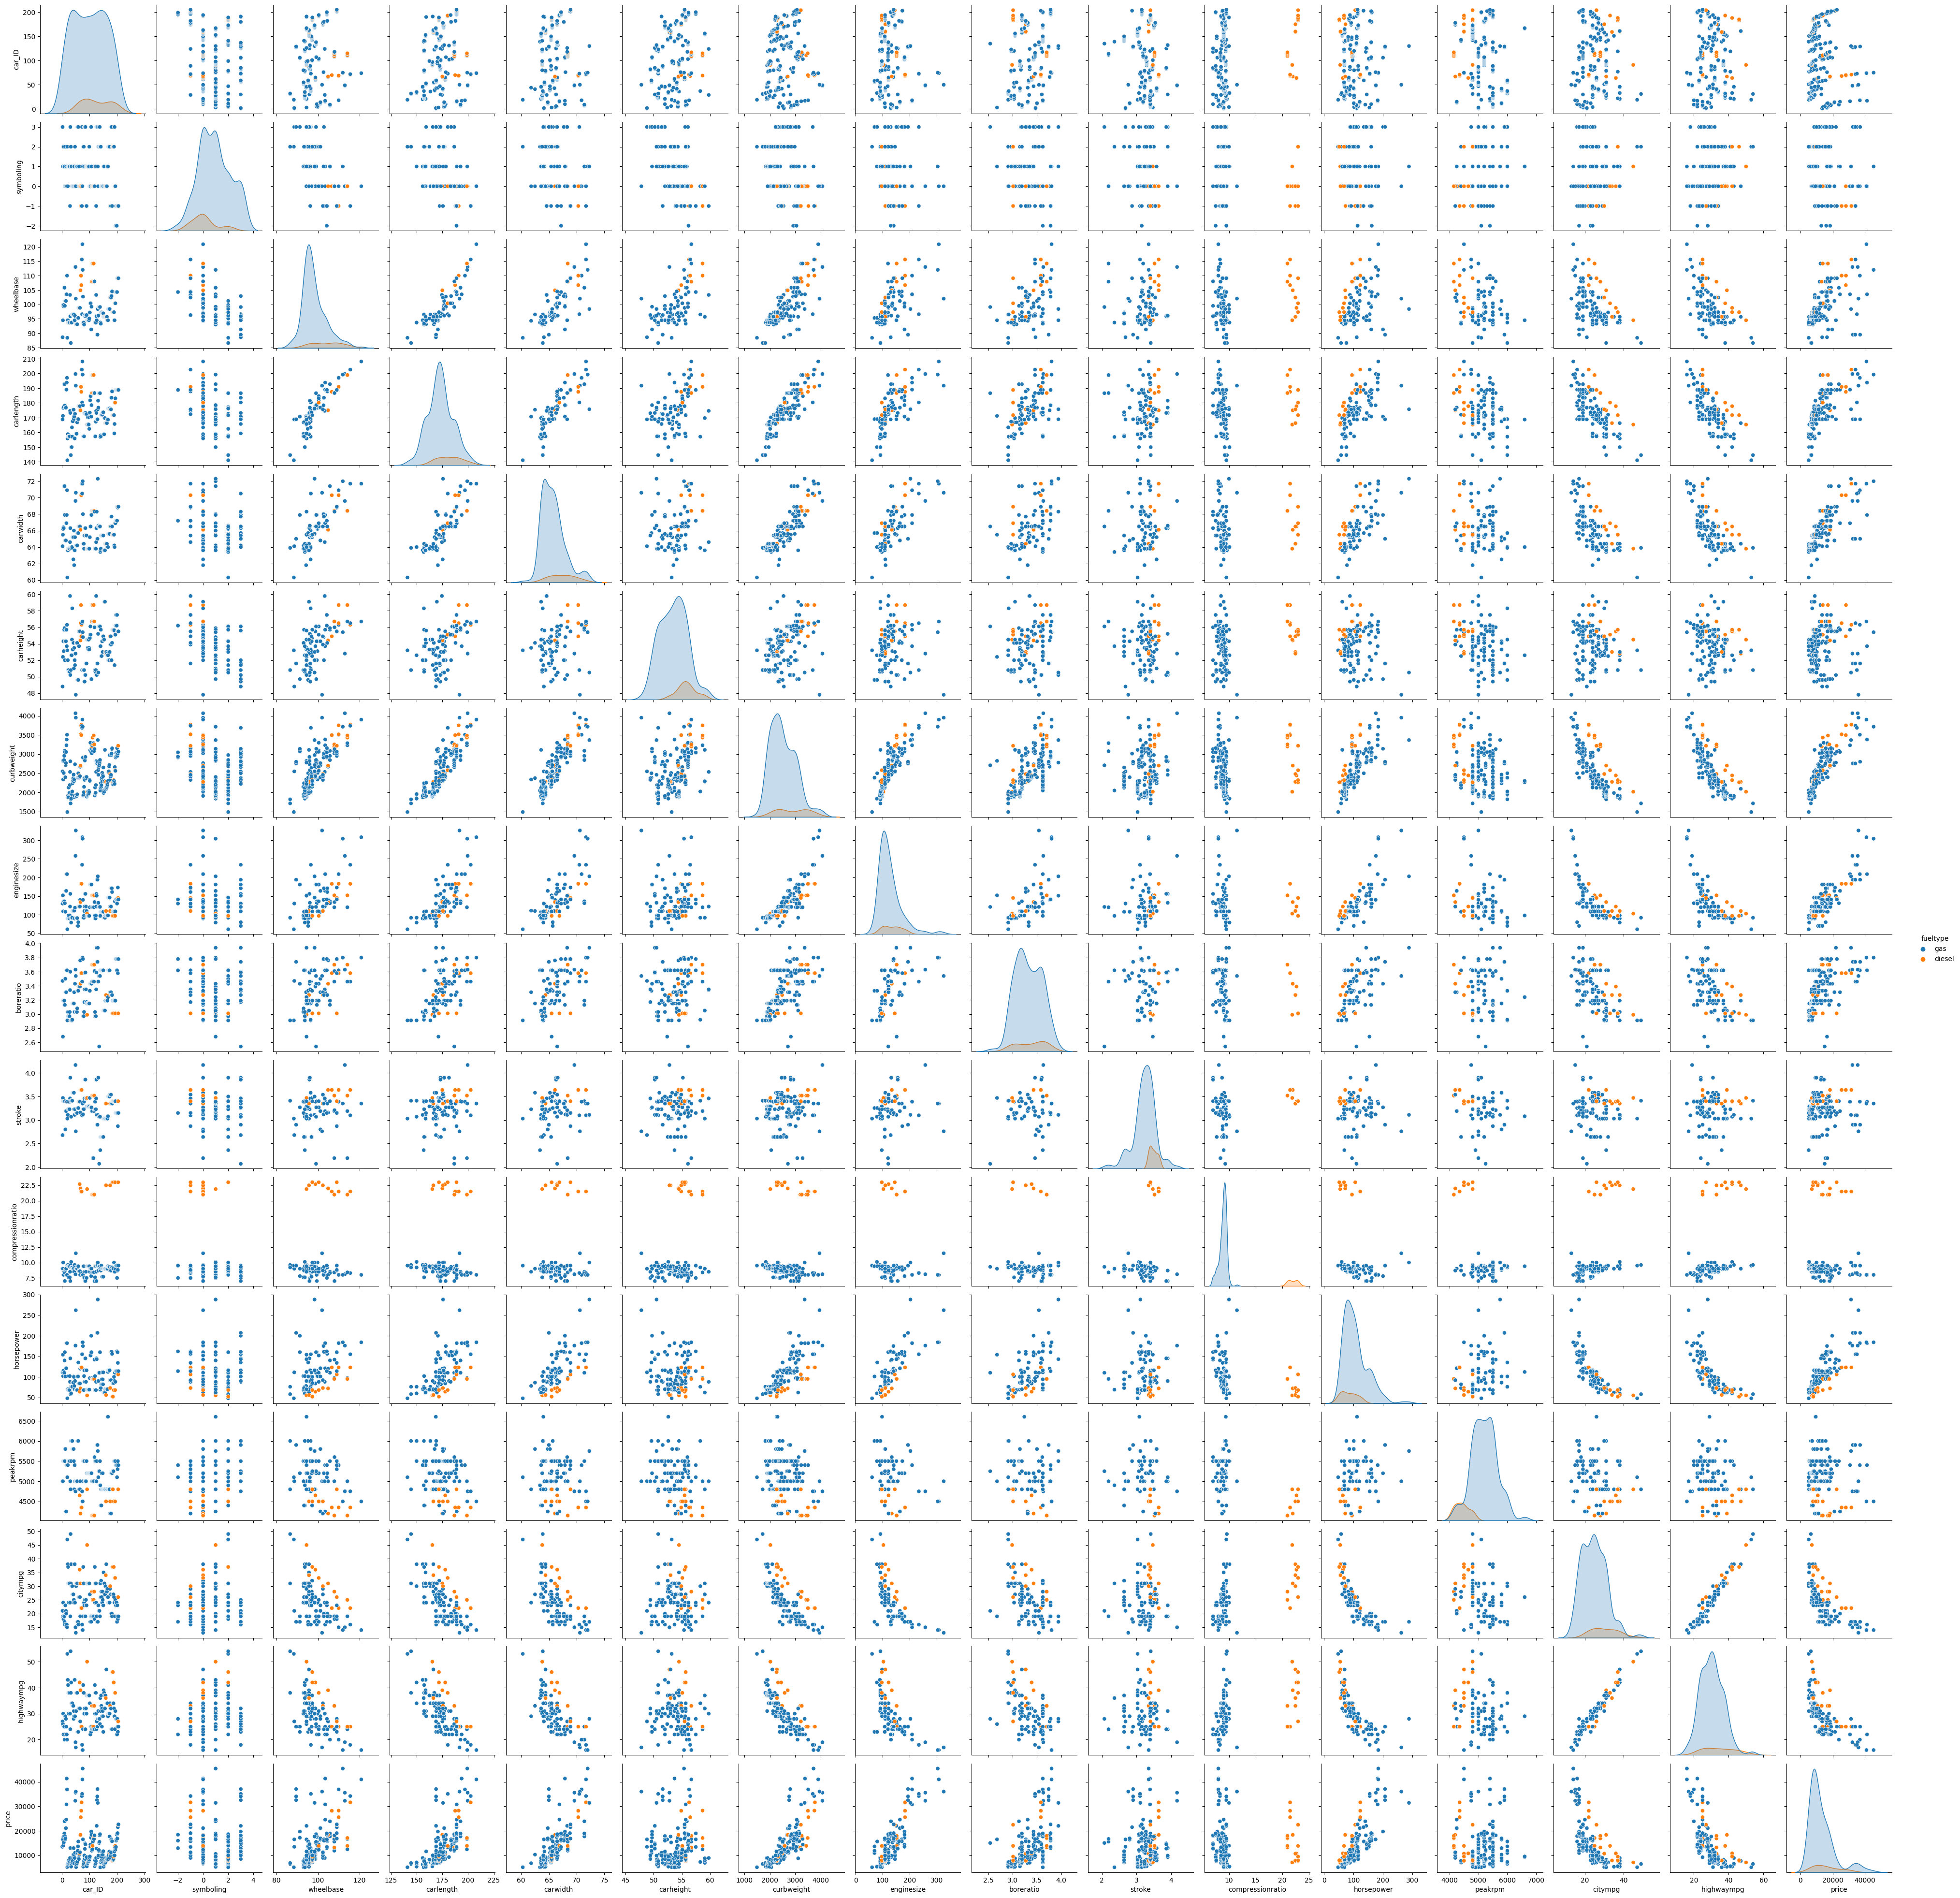

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(CarPrice_df,hue = 'fueltype')


In [12]:
corr=CarPrice_df.corr()
corr.style.background_gradient(cmap='inferno')


<AxesSubplot:>

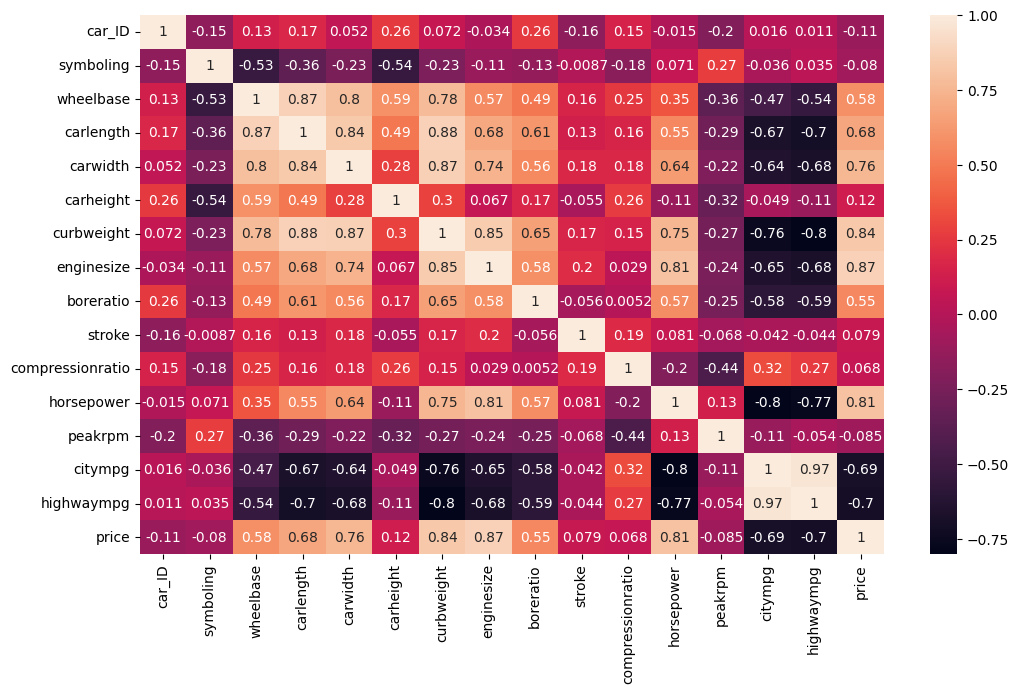

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (12,7))
sns.heatmap(CarPrice_df.corr(),annot=True)


# Feature Engg. 


In [95]:
A = {'fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem'}
print(CarPrice_df['fueltype'].unique())
print(CarPrice_df['aspiration'].unique())
print(CarPrice_df['doornumber'].unique())
print(CarPrice_df['carbody'].unique())
print(CarPrice_df['drivewheel'].unique())
print(CarPrice_df['enginelocation'].unique())
print(CarPrice_df['enginetype'].unique())
print(CarPrice_df['cylindernumber'].unique())
print(CarPrice_df['fuelsystem'].unique())


['gas' 'diesel']
['std' 'turbo']
['two' 'four']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['front' 'rear']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [13]:
CarPrice_df1.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [14]:
# update carprice
CarPrice_df1['CarName']=CarPrice_df1['CarName'].apply(lambda x: x.split(' ')[0])

In [15]:
CarPrice_df1['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [16]:
CarPrice_df1['CarName'].replace({'maxda': 'mazda', 'nissan': 'Nissan','vw': 'volkswagen','porcshce': 'porsche','vokswagen': 'volkswagen','toyouta': 'toyota'},inplace=True)
CarPrice_df1['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [17]:
CarPrice_df1.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [18]:
# CarPrice_df1['cylindernumber'].replace({'two': 2, 'three': 3, 'four': 4,'five': 5,'six': 6,'eight': 8,'twelve': 12},inplace=True)
# CarPrice_df1['doornumber'].replace({'two': 2, 'four': 4,},inplace=True)


In [19]:
CarPrice_df1.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

In [20]:
#CarPrice_df1[CarPrice_df1['price']>40503.000000]

# Outlier Handling

In [21]:
sns.boxplot(CarPrice_df1['horsepower'])

NameError: name 'sns' is not defined

In [22]:
CarPrice_df1['wheelbase']


0       88.6
1       88.6
2       94.5
3       99.8
4       99.4
       ...  
200    109.1
201    109.1
202    109.1
203    109.1
204    109.1
Name: wheelbase, Length: 205, dtype: float64

In [23]:
def outlier_handling(column):
    q1 = CarPrice_df[column].quantile(0.25)
    q3 = CarPrice_df[column].quantile(0.75)
    iqr = q3 - q1
    lower_tail = q1 - iqr*1.5
    upper_tail = q3 + iqr*1.5
    print(f'Lower_tail {lower_tail}')
    print(f'upper_tail {upper_tail}')

In [24]:
outlier_handling('wheelbase')


Lower_tail 82.64999999999999
upper_tail 114.25000000000001


In [25]:
CarPrice_df1['wheelbase'].loc[CarPrice_df['wheelbase']> 114.25000000000001]= 114.25000000000001

C:\Users\hp\AppData\Local\Temp\ipykernel_36584\974187598.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CarPrice_df1['wheelbase'].loc[CarPrice_df['wheelbase']> 114.25000000000001]= 114.25000000000001


In [26]:
outlier_handling('carwidth')
CarPrice_df1['carwidth'].loc[CarPrice_df['carwidth']>71.10000000000002]= 71.10000000000002

Lower_tail 59.89999999999998
upper_tail 71.10000000000002


C:\Users\hp\AppData\Local\Temp\ipykernel_36584\299707006.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CarPrice_df1['carwidth'].loc[CarPrice_df['carwidth']>71.10000000000002]= 71.10000000000002


In [27]:
CarPrice_df['carwidth'].median()

65.5

In [28]:
outlier_handling('enginesize')
CarPrice_df1['enginesize'].loc[CarPrice_df1['enginesize']> 207.0]=207.0

Lower_tail 31.0
upper_tail 207.0


C:\Users\hp\AppData\Local\Temp\ipykernel_36584\511515469.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CarPrice_df1['enginesize'].loc[CarPrice_df1['enginesize']> 207.0]=207.0


In [29]:
CarPrice_df1['enginesize'].median()


120.0

In [30]:
outlier_handling('stroke')
CarPrice_df1['stroke'].loc[CarPrice_df1['stroke']> 3.86] = 3.86
CarPrice_df1['stroke'].loc[CarPrice_df1['stroke']< 2.6599999999999993] =2.6599999999999993

Lower_tail 2.6599999999999993
upper_tail 3.8600000000000003


C:\Users\hp\AppData\Local\Temp\ipykernel_36584\510545047.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CarPrice_df1['stroke'].loc[CarPrice_df1['stroke']> 3.86] = 3.86
C:\Users\hp\AppData\Local\Temp\ipykernel_36584\510545047.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CarPrice_df1['stroke'].loc[CarPrice_df1['stroke']< 2.6599999999999993] =2.6599999999999993


In [31]:

outlier_handling('compressionratio')
CarPrice_df1['compressionratio'].loc[CarPrice_df1['compressionratio']> 10.600] = 10.600
CarPrice_df1['compressionratio'].loc[CarPrice_df1['compressionratio']< 7.3]=7.3


Lower_tail 7.399999999999999
upper_tail 10.600000000000001


C:\Users\hp\AppData\Local\Temp\ipykernel_36584\3334628518.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CarPrice_df1['compressionratio'].loc[CarPrice_df1['compressionratio']> 10.600] = 10.600
C:\Users\hp\AppData\Local\Temp\ipykernel_36584\3334628518.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CarPrice_df1['compressionratio'].loc[CarPrice_df1['compressionratio']< 7.3]=7.3


In [32]:
outlier_handling('horsepower')
#CarPrice_df1['horsepower'].loc[CarPrice_df1['compressionratio'] <1]
CarPrice_df1['horsepower'].loc[CarPrice_df1['horsepower']>185] = 185

Lower_tail 1.0
upper_tail 185.0


C:\Users\hp\AppData\Local\Temp\ipykernel_36584\3448148572.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CarPrice_df1['horsepower'].loc[CarPrice_df1['horsepower']>185] = 185


In [33]:
outlier_handling('peakrpm')
CarPrice_df1['peakrpm'].loc[CarPrice_df1['peakrpm'] <3750.0]
CarPrice_df1['peakrpm'].loc[CarPrice_df1['peakrpm']>6550.0]= 6550.0

Lower_tail 3750.0
upper_tail 6550.0


C:\Users\hp\AppData\Local\Temp\ipykernel_36584\2744729009.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CarPrice_df1['peakrpm'].loc[CarPrice_df1['peakrpm']>6550.0]= 6550.0


In [34]:
outlier_handling('citympg')
# CarPrice_df1['compressionratio'].loc[CarPrice_df1['compressionratio']> 10.600] = 10.600
CarPrice_df1['citympg'].loc[CarPrice_df1['citympg']> 46.5] = 46.5


Lower_tail 2.5
upper_tail 46.5


C:\Users\hp\AppData\Local\Temp\ipykernel_36584\2631058526.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CarPrice_df1['citympg'].loc[CarPrice_df1['citympg']> 46.5] = 46.5


In [35]:

outlier_handling('highwaympg')
CarPrice_df1['highwaympg'].loc[CarPrice_df1['highwaympg']> 47.5]=47.5
# CarPrice_df1['compressionratio'].loc[CarPrice_df1['compressionratio']< 7.3]=7.3

Lower_tail 11.5
upper_tail 47.5


C:\Users\hp\AppData\Local\Temp\ipykernel_36584\2753817832.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CarPrice_df1['highwaympg'].loc[CarPrice_df1['highwaympg']> 47.5]=47.5


# deleting the error elements

In [36]:
filt = CarPrice_df1['fuelsystem'] == 'spfi'

CarPrice_df1[filt]

car_ID  symboling CarName fueltype aspiration doornumber    carbody  \
46      47          2   isuzu      gas        std        two  hatchback   

   drivewheel enginelocation  wheelbase  ...  enginesize  fuelsystem  \
46        rwd          front       96.0  ...         119        spfi   

    boreratio  stroke compressionratio horsepower  peakrpm citympg  \
46       3.43    3.23              9.2         90     5000    24.0   

    highwaympg    price  
46        29.0  11048.0  

[1 rows x 26 columns]

In [37]:
CarPrice_df1.drop(129, axis=0, inplace=True)
CarPrice_df1.drop(18, axis=0, inplace=True)
CarPrice_df1.drop(49, axis=0, inplace=True)
CarPrice_df1.drop(29, axis=0, inplace=True)
CarPrice_df1.drop(46, axis=0, inplace=True)

In [ ]:
# CarPrice_df1['cylindernumber'].replace({'two': 2, 'three': 3, 'four': 4,'five': 5,'six': 6,'eight': 8,'twelve': 12},inplace=True)
# CarPrice_df1['doornumber'].replace({'two': 2, 'four': 4,},inplace=True)

In [38]:

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

column_trans = ColumnTransformer(transformers=[ 
    ('tnf1',OneHotEncoder(sparse =False,drop='first'),['fueltype', 'aspiration','carbody','drivewheel','enginelocation','enginetype','fuelsystem','cylindernumber']),
    ('tnf2',MinMaxScaler(), ['symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']),
    ('tnf3',OrdinalEncoder(categories=[['two','four']]),['doornumber'])
],remainder='passthrough')

In [104]:

# from sklearn.model_selection import train_test_split
# from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.compose import make_column_transformer
# column_trans = make_column_transformer(
#     (OneHotEncoder(), ['fueltype', 'aspiration','carbody','drivewheel','enginelocation','enginetype','fuelsystem']),
#     (MinMaxScaler(), ['symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg'])
    
# )

In [39]:
x = CarPrice_df1.drop(['price','car_ID', 'CarName'], axis=1)
y = CarPrice_df1['price']

In [128]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [129]:
column_trans.fit_transform(x_train, y_train)


array([[1.        , 0.        , 0.        , ..., 0.41935484, 0.57142857,
        1.        ],
       [1.        , 0.        , 0.        , ..., 0.51612903, 0.57142857,
        0.        ],
       [1.        , 1.        , 0.        , ..., 0.29032258, 0.44444444,
        0.        ],
       ...,
       [0.        , 1.        , 0.        , ..., 0.4516129 , 0.53968254,
        1.        ],
       [1.        , 0.        , 0.        , ..., 0.51612903, 0.47619048,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.32258065, 0.28571429,
        1.        ]])

# linear reg 

In [153]:

lin_reg_model = LinearRegression()

pipe = make_pipeline(column_trans, lin_reg_model)
pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf1',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['fueltype', 'aspiration',
                                                   'carbody', 'drivewheel',
                                                   'enginelocation',
                                                   'enginetype', 'fuelsystem',
                                                   'cylindernumber']),
                                                 ('tnf2', MinMaxScaler(),
                                                  ['symboling', 'wheelbase',
                                                   'carlength', 'carwidth',
                                                   'carheight', 'curbweight',
                                                   'enginesize', 'boreratio',
                                                   'stroke', 'compressionratio',
                                                   'horsepower', 'peakrpm',
                                                   'citympg', 'highwaympg']),
                                                 ('tnf3',
                                                  OrdinalEncoder(categories=[['two',
                                                                              'four']]),
                                                  ['doornumber'])])),
                ('linearregression', LinearRegression())])

In [154]:
### Testing data  

y_pred = pipe.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print(f"MSE = {mse}")
print(f"RMSE = {np.sqrt(mse)}")
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE = {mae}")
r2 = r2_score(y_test, y_pred)
print(f"R-Sequared Value = {r2}")
n = x_test.shape[0]
k = x_test.shape[1]
adj_r2 = 1 - ((1-r2)* (n-1) / (n -k-1)) 
print(f"Adjusted R- Sequared Value = {adj_r2}")

y_pred = pipe.predict(x_train)

mse = mean_squared_error(y_train, y_pred)
print(f"MSE = {mse}")
print(f"RMSE = {np.sqrt(mse)}")
mae = mean_absolute_error(y_train, y_pred)
print(f"MAE = {mae}")
r2 = r2_score(y_train, y_pred)
print(f"R-Sequared Value = {r2}")
n = x_train.shape[0]
k = x_train.shape[1]
adj_r2 = 1 - ((1-r2)* (n-1) / (n -k-1)) 
print(f"Adjusted R- Sequared Value = {adj_r2}")

MSE = 14772083.640650453
RMSE = 3843.4468437394125
MAE = 2360.575087225283
R-Sequared Value = 0.8436443041285983
Adjusted R- Sequared Value = 0.7053296500885121
MSE = 3251036.3843904524
RMSE = 1803.0630561326614
MAE = 1390.4544535392922
R-Sequared Value = 0.9307473656520543
Adjusted R- Sequared Value = 0.9181060117631435


# Ridge

In [155]:
ridge_model = Ridge()
pipe = make_pipeline(column_trans, ridge_model)
pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf1',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['fueltype', 'aspiration',
                                                   'carbody', 'drivewheel',
                                                   'enginelocation',
                                                   'enginetype', 'fuelsystem',
                                                   'cylindernumber']),
                                                 ('tnf2', MinMaxScaler(),
                                                  ['symboling', 'wheelbase',
                                                   'carlength', 'carwidth',
                                                   'carheight', 'curbweight',
                                                   'enginesize', 'boreratio',
                                                   'stroke', 'compressionratio',
                                                   'horsepower', 'peakrpm',
                                                   'citympg', 'highwaympg']),
                                                 ('tnf3',
                                                  OrdinalEncoder(categories=[['two',
                                                                              'four']]),
                                                  ['doornumber'])])),
                ('ridge', Ridge())])

In [156]:
### Testing data  

y_pred = pipe.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print(f"MSE = {mse}")
print(f"RMSE = {np.sqrt(mse)}")
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE = {mae}")
r2 = r2_score(y_test, y_pred)
print(f"R-Sequared Value = {r2}")
n = x_test.shape[0]
k = x_test.shape[1]
adj_r2 = 1 - ((1-r2)* (n-1) / (n -k-1)) 
print(f"Adjusted R- Sequared Value = {adj_r2}")

y_pred = pipe.predict(x_train)

mse = mean_squared_error(y_train, y_pred)
print(f"MSE = {mse}")
print(f"RMSE = {np.sqrt(mse)}")
mae = mean_absolute_error(y_train, y_pred)
print(f"MAE = {mae}")
r2 = r2_score(y_train, y_pred)
print(f"R-Sequared Value = {r2}")
n = x_train.shape[0]
k = x_train.shape[1]
adj_r2 = 1 - ((1-r2)* (n-1) / (n -k-1)) 
print(f"Adjusted R- Sequared Value = {adj_r2}")



MSE = 16332995.899702061
RMSE = 4041.4101375265122
MAE = 2652.4388380289415
R-Sequared Value = 0.8271227673978823
Adjusted R- Sequared Value = 0.6741929077883165
MSE = 5188149.56658979
RMSE = 2277.7509887144797
MAE = 1567.8232551826413
R-Sequared Value = 0.8894835423551063
Adjusted R- Sequared Value = 0.8693099032611971


In [157]:
ridge_model = Ridge(alpha =2)
pipe = make_pipeline(column_trans, ridge_model)
pipe.fit(x_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf1',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['fueltype', 'aspiration',
                                                   'carbody', 'drivewheel',
                                                   'enginelocation',
                                                   'enginetype', 'fuelsystem',
                                                   'cylindernumber']),
                                                 ('tnf2', MinMaxScaler(),
                                                  ['symboling', 'wheelbase',
                                                   'carlength', 'carwidth',
                                                   'carheight', 'curbweight',
                                                   'enginesize', 'boreratio',
                                                   'stroke', 'compressionratio',
                                                   'horsepower', 'peakrpm',
                                                   'citympg', 'highwaympg']),
                                                 ('tnf3',
                                                  OrdinalEncoder(categories=[['two',
                                                                              'four']]),
                                                  ['doornumber'])])),
                ('ridge', Ridge(alpha=2))])

In [158]:
### Testing data  

y_pred = pipe.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print(f"MSE = {mse}")
print(f"RMSE = {np.sqrt(mse)}")
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE = {mae}")
r2 = r2_score(y_test, y_pred)
print(f"R-Sequared Value = {r2}")
n = x_test.shape[0]
k = x_test.shape[1]
adj_r2 = 1 - ((1-r2)* (n-1) / (n -k-1)) 
print(f"Adjusted R- Sequared Value = {adj_r2}")

y_pred = pipe.predict(x_train)

mse = mean_squared_error(y_train, y_pred)
print(f"MSE = {mse}")
print(f"RMSE = {np.sqrt(mse)}")
mae = mean_absolute_error(y_train, y_pred)
print(f"MAE = {mae}")
r2 = r2_score(y_train, y_pred)
print(f"R-Sequared Value = {r2}")
n = x_train.shape[0]
k = x_train.shape[1]
adj_r2 = 1 - ((1-r2)* (n-1) / (n -k-1)) 
print(f"Adjusted R- Sequared Value = {adj_r2}")


MSE = 19414094.70677569
RMSE = 4406.142837763625
MAE = 2886.595554757339
R-Sequared Value = 0.7945107568144294
Adjusted R- Sequared Value = 0.6127318109195015
MSE = 6169890.170414115
RMSE = 2483.9263617132683
MAE = 1686.6477496769783
R-Sequared Value = 0.8685707886905776
Adjusted R- Sequared Value = 0.8445797421817147


In [40]:
from sklearn.model_selection import RandomizedSearchCV
pipe = make_pipeline(column_trans, ridge_hyp_model)
pipe.fit(x_train, y_train)

NameError: name 'make_pipeline' is not defined

In [175]:
ridge_hyp_model = Ridge()

hyp = {"alpha": np.arange(0.05, 0.5, 0.1)}

rscv = RandomizedSearchCV(ridge_hyp_model,hyp,cv = 5)
pipe = make_pipeline(column_trans, rscv)
pipe.fit(x_train,y_train)

C:\Users\hp\anaconda3\envs\cpp\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf1',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['fueltype', 'aspiration',
                                                   'carbody', 'drivewheel',
                                                   'enginelocation',
                                                   'enginetype', 'fuelsystem',
                                                   'cylindernumber']),
                                                 ('tnf2', MinMaxScaler(),
                                                  ['symboling', 'wheelbase',
                                                   'carlength', 'carwidth',
                                                   'carheight', 'curbweight',
                                                   'enginesize', 'boreratio',
                                                   'stroke', 'compressionratio',
                                                   'horsepower', 'peakrpm',
                                                   'citympg', 'highwaympg']),
                                                 ('tnf3',
                                                  OrdinalEncoder(categories=[['two',
                                                                              'four']]),
                                                  ['doornumber'])])),
                ('randomizedsearchcv',
                 RandomizedSearchCV(cv=5, estimator=Ridge(),
                                    param_distributions={'alpha': array([0.05, 0.15, 0.25, 0.35, 0.45])}))])

In [176]:
rscv.best_estimator_

Ridge(alpha=0.15000000000000002)

In [178]:
l2_hyp_model = rscv.best_estimator_
pipe = make_pipeline(column_trans, l2_hyp_model)
pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf1',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['fueltype', 'aspiration',
                                                   'carbody', 'drivewheel',
                                                   'enginelocation',
                                                   'enginetype', 'fuelsystem',
                                                   'cylindernumber']),
                                                 ('tnf2', MinMaxScaler(),
                                                  ['symboling', 'wheelbase',
                                                   'carlength', 'carwidth',
                                                   'carheight', 'curbweight',
                                                   'enginesize', 'boreratio',
                                                   'stroke', 'compressionratio',
                                                   'horsepower', 'peakrpm',
                                                   'citympg', 'highwaympg']),
                                                 ('tnf3',
                                                  OrdinalEncoder(categories=[['two',
                                                                              'four']]),
                                                  ['doornumber'])])),
                ('ridge', Ridge(alpha=0.15000000000000002))])

In [179]:
### Testing data  

y_pred = pipe.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print(f"MSE = {mse}")
print(f"RMSE = {np.sqrt(mse)}")
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE = {mae}")
r2 = r2_score(y_test, y_pred)
print(f"R-Sequared Value = {r2}")
n = x_test.shape[0]
k = x_test.shape[1]
adj_r2 = 1 - ((1-r2)* (n-1) / (n -k-1)) 
print(f"Adjusted R- Sequared Value = {adj_r2}")

y_pred = pipe.predict(x_train)

mse = mean_squared_error(y_train, y_pred)
print(f"MSE = {mse}")
print(f"RMSE = {np.sqrt(mse)}")
mae = mean_absolute_error(y_train, y_pred)
print(f"MAE = {mae}")
r2 = r2_score(y_train, y_pred)
print(f"R-Sequared Value = {r2}")
n = x_train.shape[0]
k = x_train.shape[1]
adj_r2 = 1 - ((1-r2)* (n-1) / (n -k-1)) 
print(f"Adjusted R- Sequared Value = {adj_r2}")


MSE = 12476985.953399636
RMSE = 3532.2777288032767
MAE = 2299.4299447300064
R-Sequared Value = 0.8679368551804649
Adjusted R- Sequared Value = 0.7511117655324147
MSE = 3607846.0584880156
RMSE = 1899.4330887104225
MAE = 1387.3427979746252
R-Sequared Value = 0.923146709439552
Adjusted R- Sequared Value = 0.9091179341785178
